## **Imports and Data Loading**

In [73]:
import warnings
warnings.filterwarnings("ignore")

In [74]:
# Basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Modelling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# Imbalance 
from imblearn.over_sampling import SMOTE

# Load the data
df = pd.read_csv(r"D:\DSA\Datasets\creditcard.csv")


## **Exploratory Data Analysis**

In [76]:
# first few rows
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [77]:
df.shape

(284807, 31)

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Class
0    284315
1       492
Name: count, dtype: int64


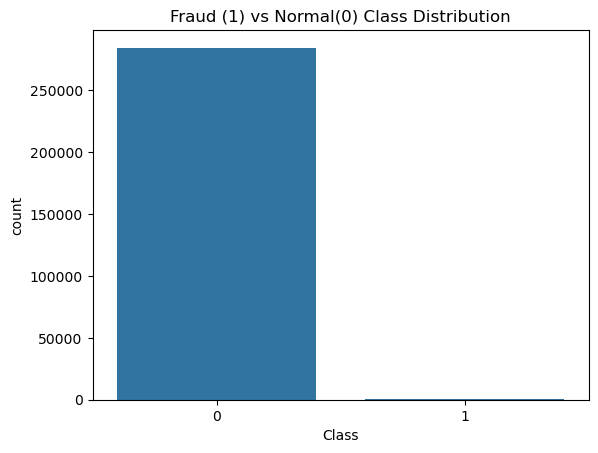

In [79]:
# Class distribution
print(df['Class'].value_counts())
sns.countplot(x='Class', data=df)
plt.title('Fraud (1) vs Normal(0) Class Distribution')
plt.show()

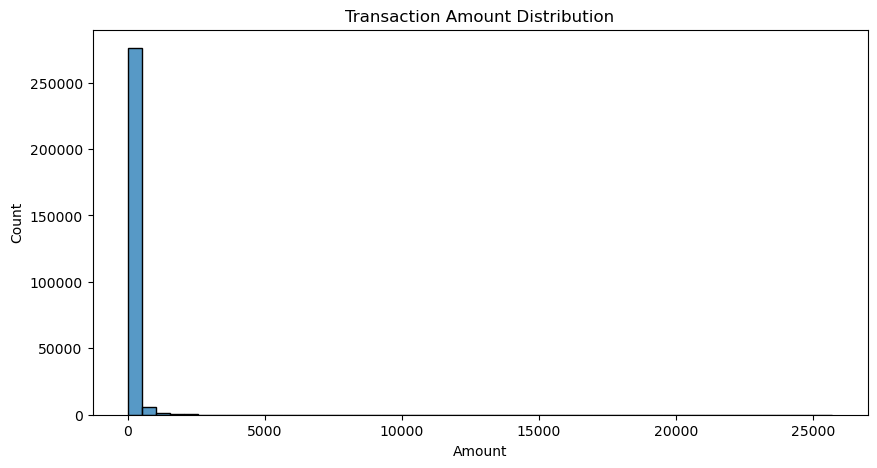

In [80]:
# Amount Distribution
plt.figure(figsize=(10,5))
sns.histplot(df['Amount'], bins=50)
plt.title('Transaction Amount Distribution')
plt.show()

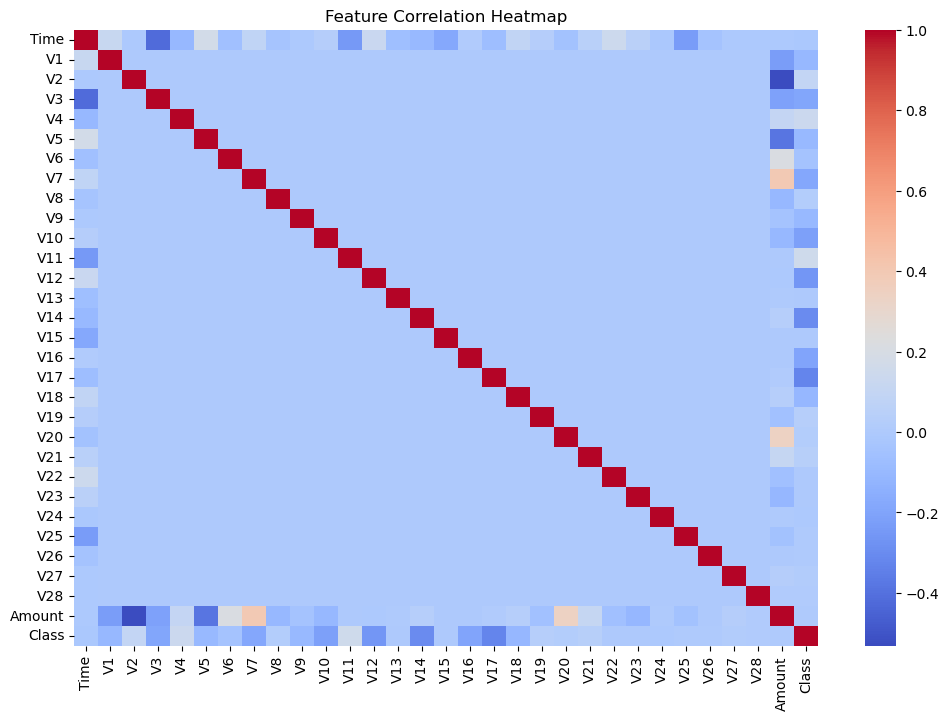

In [81]:
# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title('Feature Correlation Heatmap')
plt.show()

## **Data Preprocessing**

In [83]:
# Scale 'Amount' and 'Time'
scaler = StandardScaler()
df['scaled_amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = scaler.fit_transform(df['Time'].values.reshape(-1,1))


#Drop original columns
df.drop(['Time','Amount'], axis=1, inplace=True)

#Split features and target
X = df.drop('Class', axis=1)
y = df['Class']

#Train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)
#SMOTE to balance classes
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train,y_train)

## **Modeling and Evaluation**

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99     55430
           1       0.93      0.06      0.11      1532

    accuracy                           0.97     56962
   macro avg       0.95      0.53      0.55     56962
weighted avg       0.97      0.97      0.96     56962



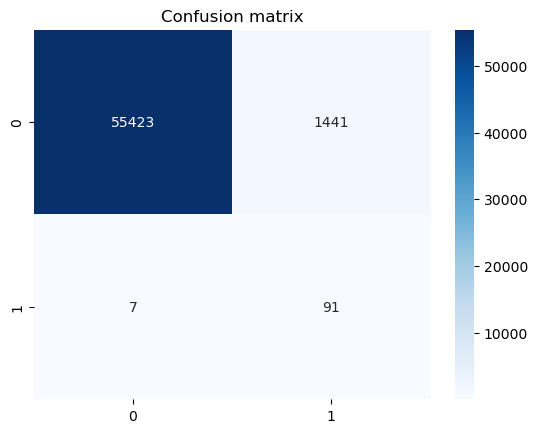

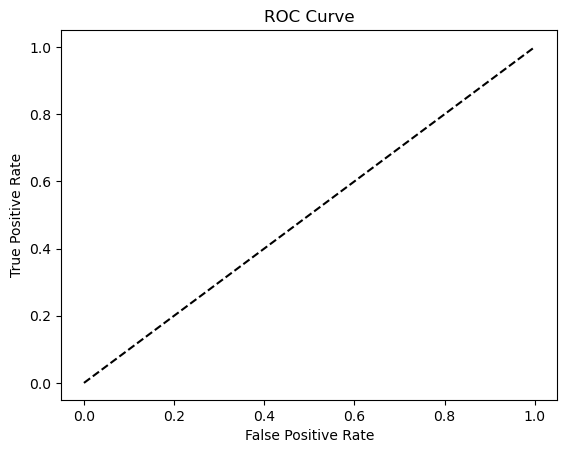

In [85]:
# Logistic Regression
lr = LogisticRegression(max_iter =1000)
lr.fit(X_res, y_res)
y_pred = lr.predict(X_test)

# Evaluation
print("Classification Report:\n", classification_report(y_pred,y_test))
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt ='d', cmap='Blues')
plt.title("Confusion matrix")
plt.show()

# ROC Curve
y_scores = lr.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend
plt.show()

# **Random Forest Modeling and Evaluation**

In [87]:
# Train the model
from sklearn.ensemble import RandomForestClassifier
#initialize the model
rf = RandomForestClassifier(n_estimators =100, random_state=42)
# Train the model on SMOTE-resampled training data
rf.fit(X_res, y_res)

RandomForestClassifier(random_state=42)

In [88]:
#predict on the original test set
rf_pred = rf.predict(X_test)

In [89]:
# Classification report
print("Random Forest classification report:\n", classification_report(y_test, rf_pred))

Random Forest classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.89      0.85      0.87        98

    accuracy                           1.00     56962
   macro avg       0.95      0.92      0.93     56962
weighted avg       1.00      1.00      1.00     56962



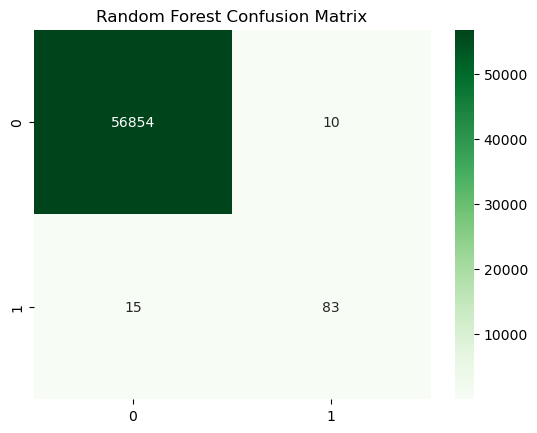

In [90]:
#confusion matrix
sns.heatmap(confusion_matrix(y_test,rf_pred), annot=True, fmt='d', cmap='Greens')
plt.title("Random Forest Confusion Matrix")
plt.show()

### ROC-AUC Curve

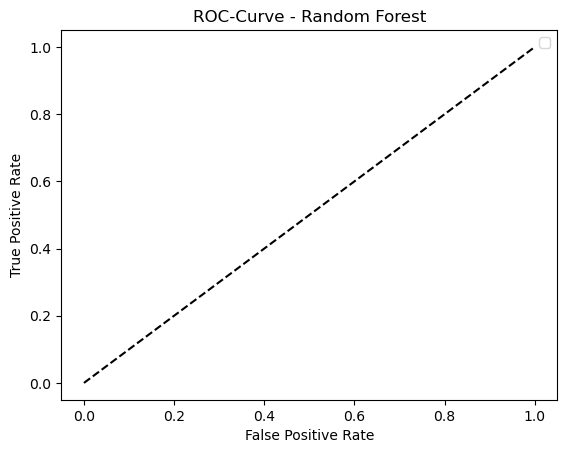

ROC-AUC Score (Random Forest): 0.9899695334661721


In [92]:
# get probability scores
rf_probs = rf.predict_proba(X_test)[:,1]
# ROC Curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-Curve - Random Forest")
plt.legend()
plt.show()

# ROC- AUC Curve
roc_score_rf = roc_auc_score(y_test, rf_probs)
print("ROC-AUC Score (Random Forest):", roc_score_rf)

## **XGBoost**

XGBoost Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.74      0.85      0.79        98

    accuracy                           1.00     56962
   macro avg       0.87      0.92      0.90     56962
weighted avg       1.00      1.00      1.00     56962



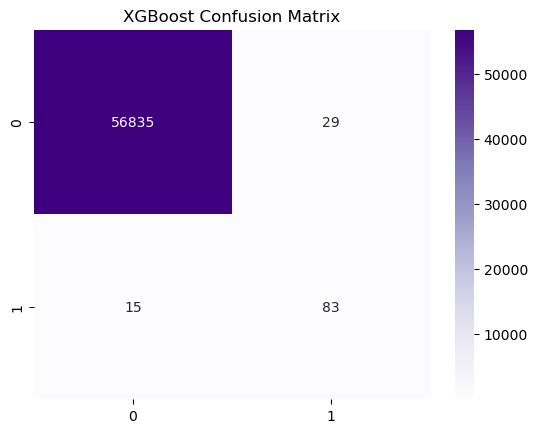

In [94]:
from xgboost import XGBClassifier

#initialize XGBoost model
xgb = XGBClassifier(use_label_encoder=False, eval_metric = 'logloss', random_state=42)

#Train on SMOTE data
xgb.fit(X_res, y_res)
#predict
xgb_pred = xgb.predict(X_test)
#Evaluation 
print("XGBoost Classification Report:\n", classification_report(y_test, xgb_pred))
sns.heatmap(confusion_matrix(y_test, xgb_pred), annot=True, fmt='d', cmap='Purples')
plt.title("XGBoost Confusion Matrix")
plt.show()

### ROC-AUC for XGBoost

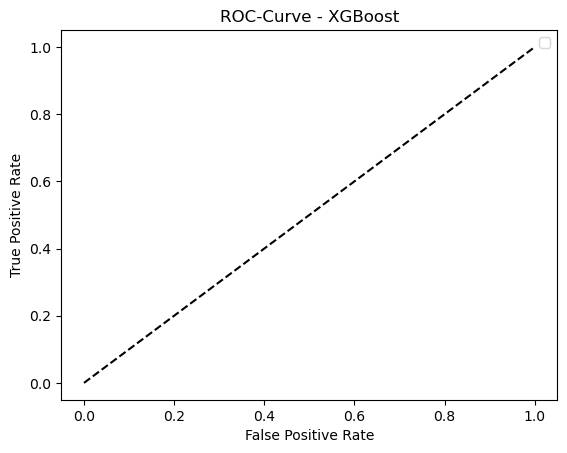

ROC-AUC Score (XGBoost): 0.9812337779793966


In [96]:
# get probability scores
xgb_probs = xgb.predict_proba(X_test)[:,1]
# ROC Curve
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_probs)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-Curve - XGBoost")
plt.legend()
plt.show()

# ROC- AUC Curve
roc_score_xgb = roc_auc_score(y_test, xgb_probs)
print("ROC-AUC Score (XGBoost):", roc_score_xgb)

## **Final Model Comparison Table**

In [98]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
# Helper function
def get_scores(y_test, y_pred, y_probs, model_name):
    return {
        "Model": model_name,
        "Precision (Fraud)": precision_score(y_test,y_pred),
        "Recall (Fraud)": recall_score(y_test,y_pred),
        "F1 Score":f1_score(y_test,y_pred),
        "ROC-AUC": roc_auc_score(y_test,y_pred)
    }
# calculate scores
log_scores = get_scores(y_test,y_pred,y_scores,"LogisticRegression")
rf_scores = get_scores(y_test,rf_pred,rf_probs,"Random Forest")
xgb_scores = get_scores(y_test,xgb_pred,xgb_probs,"XGBoost")
# Create DataFrame
results_df = pd.DataFrame([log_scores, rf_scores, xgb_scores])
results_df.set_index ("Model", inplace=True)
results_df
        
    
        

,Precision (Fraud),Recall (Fraud),F1 Score,ROC-AUC
Model,,,,
LogisticRegression,0.059399,0.928571,0.111656,0.951615
Random Forest,0.892473,0.846939,0.869110,0.923381
XGBoost,0.741071,0.846939,0.790476,0.923214


### **Final Model Choice:**

Random Forest was selected as the best model for deployment due to its excellent balance of precision and recall, making it the most reliable for real-world fraud detection